## 아래의 실습은 (https://kuduz.tistory.com/1087) 이 사이트의 자료를 인용하였습니다.

## 사용할 패키지 설치하기

In [4]:
library('tidygraph')
library('ggraph')
library("dplyr")
library("igraph")

Warning message:
"package 'tidygraph' was built under R version 3.6.3"

Attaching package: 'tidygraph'


The following object is masked from 'package:stats':

    filter


Warning message:
"package 'ggraph' was built under R version 3.6.3"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following object is masked from 'package:tidygraph':

    groups


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:

## 사용할패키지 불러오기

In [6]:
feat <- read.csv("featuring.csv") #featuring 파일 불러오기
head(feat)
class(feat)
fg <- as_tbl_graph(feat)
class(fg)

,from,to
,<fct>,<fct>
1,아이유,G-DRAGON
2,에픽하이,아이유
3,에픽하이,오혁
4,아이유,오혁
5,HIGH4,아이유
6,에픽하이,MINO


[1] "data.frame"

[1] "tbl_graph" "igraph"

## featruing 파일 불러오기

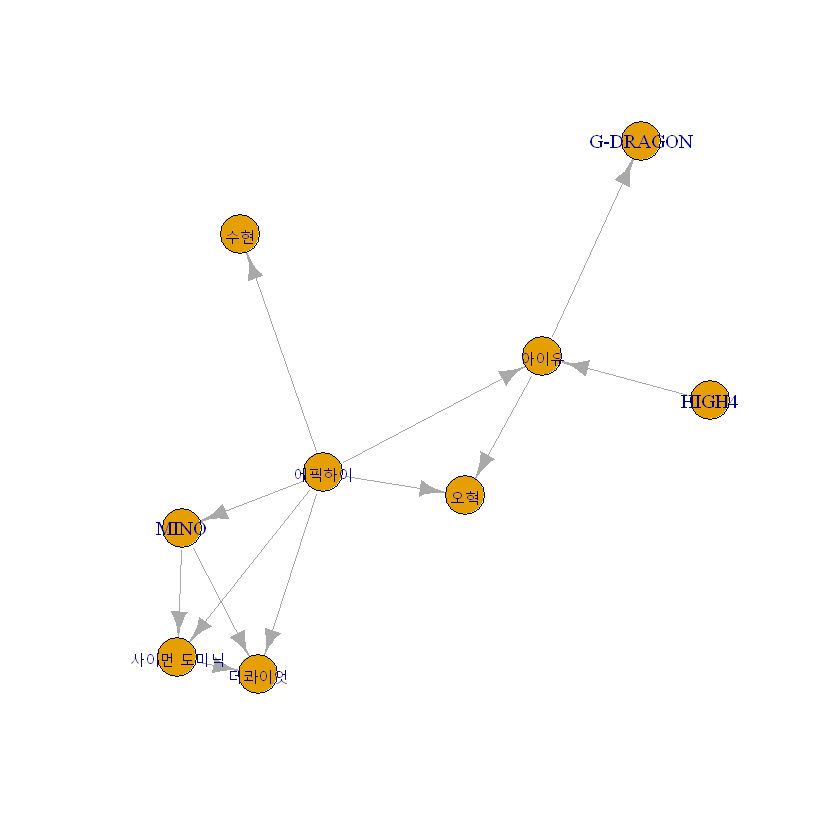

In [9]:
## 뮤지션이 각각 노드이고, 이들이 피처링한 관계가 엣지가 된다.
## tidygraph에서는 노드에 번호로 코드를 붙인 다음 이 번호를 연곃라는 방식으로 엣지를 정리한다.

# plot이라는 기본 시각화 함수를 사용하여 fg의 값을 출력해본다. 이로 인해 기본적인 네트워크 표현을 해주었다.
plot(fg)

## ggraph를 이용해 그래프 구체화 해보기

Using `sugiyama` as default layout



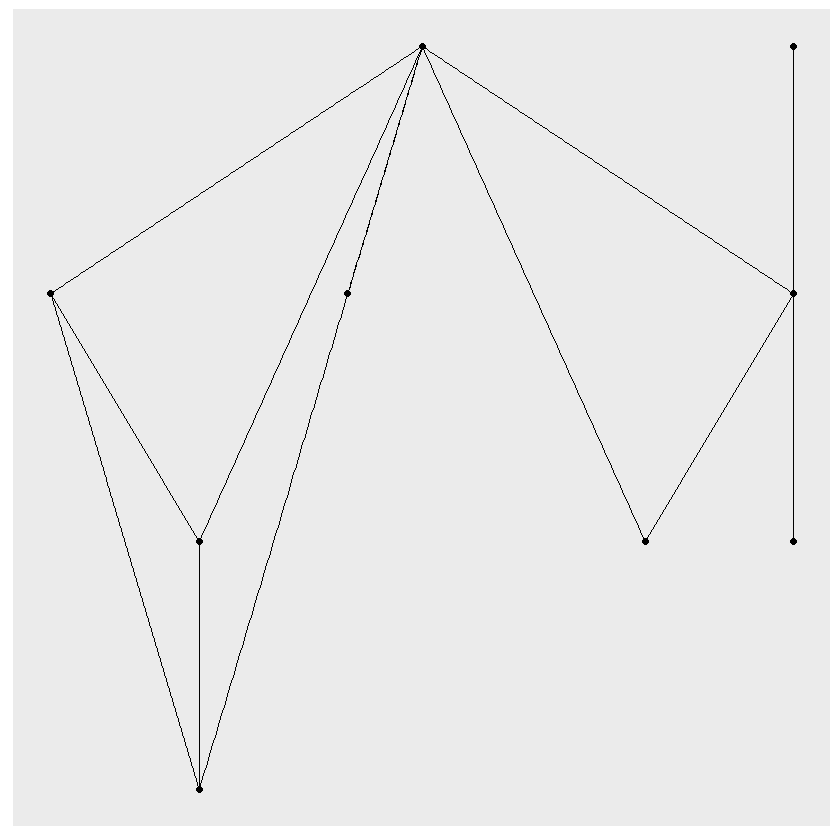

In [15]:
# fg라는 데이터를 가지고 와서 각 노드를 점으로 찍고, 엣지는 선으로 연결하는 것이다.
ggraph(fg) +  geom_node_point()  +  geom_edge_link()

## 파이프 또는 %>%

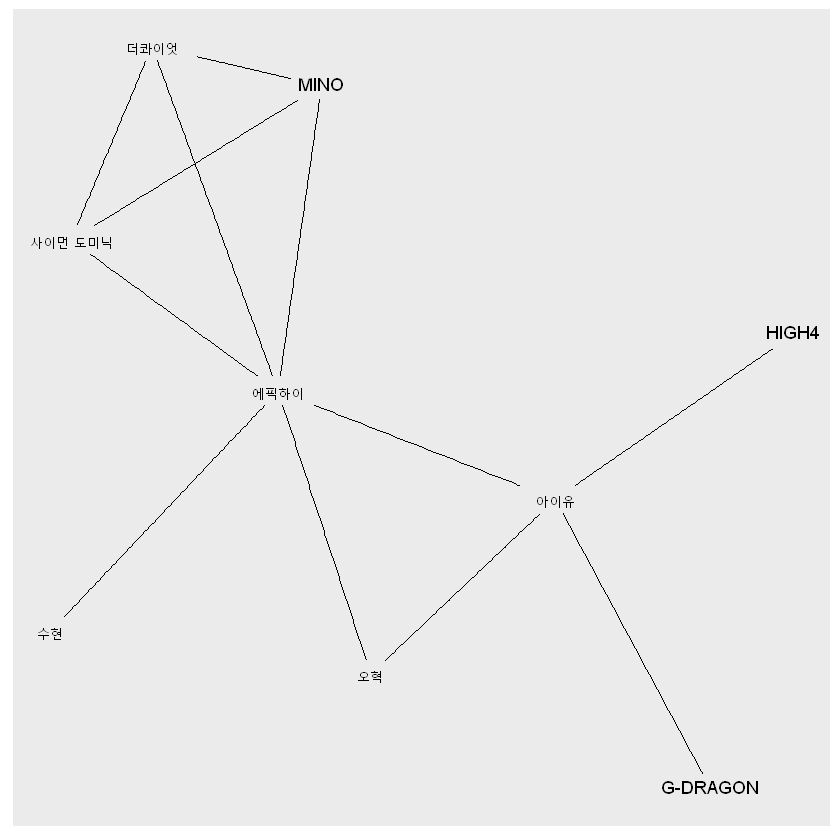

In [17]:
# 여기서는 ggraph의 kk라는 layout을 사용하였다. 
feat %>%
  as_tbl_graph() %>%
  ggraph(layout='kk') + 
  geom_node_text(aes(label=name)) +
  geom_edge_link(aes(start_cap = label_rect(node1.name), end_cap = label_rect(node2.name)))

## 중심성(centrality) 확인하기

- centrality_closeness는 근접 중심성을 계산해준다.
- centrality_betweenness 매개 중심성을 계산해주는 함수이다.

In [19]:
# 중심성 계산 

# 여기서는 노드별 매개 중심성을 계산한 bet 열을 기준으로 내림차순(descending)으로 정렬하라고 입력했다. 
feat %>% 
  as_tbl_graph() %>% 
  mutate(bet= centrality_betweenness()) %>%
  as_tibble %>%
  arrange(desc(bet))


feat %>% 
  as_tbl_graph() %>% 
  mutate(bet=centrality_betweenness(),
             clo=centrality_closeness()) %>%
  as_tibble

# tidygraph는 이런 거리를 계산할 수 있도록 graph_mean_distance()라는 함수를 가지고 있다.
feat %>% as_tbl_graph() %>%
  with_graph(graph_mean_dist())

name,bet
<chr>,<dbl>
아이유,3
에픽하이,0
HIGH4,0
MINO,0
사이먼 도미닉,0
G-DRAGON,0
오혁,0
더콰이엇,0
수현,0


Warning message:
"Problem with `mutate()` input `clo`.
i At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs
i Input `clo` is `centrality_closeness()`."
Warning message in closeness(graph = graph, vids = V(graph), mode = mode, weights = weights, :
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"


name,bet,clo
<chr>,<dbl>,<dbl>
아이유,3,0.01785714
에픽하이,0,0.05882353
HIGH4,0,0.02000000
MINO,0,0.01785714
사이먼 도미닉,0,0.01562500
G-DRAGON,0,0.01388889
오혁,0,0.01388889
더콰이엇,0,0.01388889
수현,0,0.01388889


[1] 1.2

## 수도권 전철 노선 자료

In [21]:
subway <- read.csv('subway.csv')

## ggraph를 활용해 그래프 그려보기


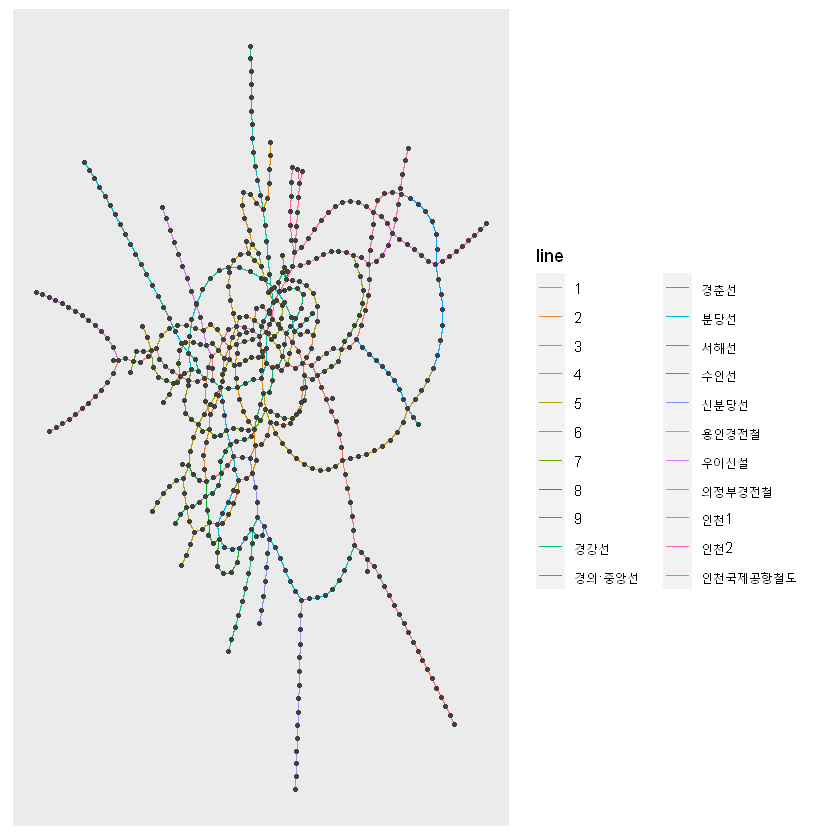

In [23]:
# 엣지는 호선별(line)로 색깔을 다르게 그리고, 노드는 색깔이 25% 회색이고 크기는 1인점으로 표현하였다.

subway %>% as_tbl_graph() %>%
  ggraph(layout='kk') + 
  geom_edge_link(aes(color=line)) + 
  geom_node_point(color='gray25', size=1)

## 지하철의 고유벡터 중심성을 계산해본다.

In [46]:
# 결과로 회기역, 청량리역, 중랑역이 중요한 역이라고 하는데, 이런 결과가 나온 것은 중심성을 계산할 때 엣지를 모두 똑같이 취급하였기 때문이다.
subway %>% as_tbl_graph() %>% mutate(eig=centrality_eigen()) %>% as_tibble %>% arrange(desc(eig)) %>% head()

name,eig
<chr>,<dbl>
회기,1.0000000
청량리,0.8832807
중랑,0.5794512
왕십리,0.3591030
외대앞,0.2628353
제기동,0.2372446


In [25]:
metro <- read.csv('metro.csv')
head(metro)

# 중심성 구하기, 이 방식으로 했을 경우, 정확한 순위를 알 수 없다. 이럴 때 네트워크 특성을 정확하게 ㅣ해하기 위해 가중치(weights)라는 개념이 필요하다.
metro %>% as_tbl_graph() %>%
  mutate(eig=centrality_eigen()) %>%
  as_tibble %>% 
  arrange(desc(eig))

,from,to,total
,<fct>,<fct>,<int>
1,가능,가락시장,103
2,가능,가산디지털단지,593
3,가능,가양,102
4,가능,가재울,1
5,가능,가정,2
6,가능,가정중앙시장,5


name,eig
<chr>,<dbl>
가산디지털단지,1.0000000
영등포,1.0000000
사당,1.0000000
신도림,1.0000000
서울역,1.0000000
신림,1.0000000
천호,0.9996930
청량리,0.9996930
홍대입구,0.9996930


## 가중치 반영한 중심성 순위 구하기

In [45]:
# centrality_pagerank(weights=total) 이걸 통해 알 수 있듯이 페이지 랭크는 순위를 따지는 함수이고, 여기서 가중치는 total이라는 열에 두었다.
metro %>% as_tbl_graph() %>%
  mutate(eig=centrality_pagerank(weights=total)) %>%
  as_tibble %>% 
  arrange(desc(eig)) %>% head()

name,eig
<chr>,<dbl>
강남,0.013610434
고속터미널,0.010648969
잠실,0.010488594
홍대입구,0.010395313
서울역,0.009233606
사당,0.007525885


## 프로배구 남자부 데이터에서 발견할 수 있는 놀라운 관계

In [27]:
k <- read.csv('kovo.csv')
head(k)

,선수,고교,대학
,<fct>,<fct>,<fct>
1,곽승석,동성고,경기대
2,김학민,수성고,경희대
3,심홍석,경북사대부고,홍익대
4,정지석,송림고,
5,임동혁,제천산업고,
6,김규민,벌교상고,경기대


## sna가 제대로 작동하기 위해서 데이터를 전처리한다. 기존 데이터는 고교, 대학 이렇게 2개의 열이였지만, 학교라는 한 개의 열로 바꾸고 두 열을 rbind 해준다.

In [28]:
k_고교 <- k[, c(1, 2)]
k_대학 <- k[, c(1, 3)]
names(k_고교)[2] <- '학교'
names(k_대학)[2] <- '학교'
k <- rbind(k_고교, k_대학)

# 이상태로 고유벡터 중심성을 계산해보자.

In [44]:
k %>% as_tbl_graph() %>%
  mutate(eig=centrality_eigen()) %>%
  arrange(desc(eig)) %>%
  as_tibble %>% head()

name,eig
<chr>,<dbl>
경기대,1.0000000
송림고,0.7159369
한양대,0.4013367
성균관대,0.3926957
안우재,0.3598989
이민욱,0.3598989


## 고유벡터 중심성 계산에서 한 노드가 높게 나오면 다른 노드까지 덩달아 중심성이 높에 올라가는 현상이 발생한다. 이를 해결하기 위해서 페이지랭크를 사용한다. 

In [43]:
k %>% as_tbl_graph() %>%
  mutate(pr=centrality_pagerank()) %>%
  arrange(desc(pr)) %>%
  as_tibble %>% head()

name,pr
<chr>,<dbl>
경기대,0.03625744
성균관대,0.03625744
인하대,0.03438395
한양대,0.03251047
송림고,0.02876350
경희대,0.02689002


# 이제 노드에서 선수만 분리하는 작업을 실행해본다.

In [31]:
kg <- graph_from_data_frame(k)
V(kg)$type <- bipartite_mapping(kg)$type
km <- as_incidence_matrix(kg)
km <- km %*% t(km)
diag(km) <- 0

## 위 pagerank를 통해 고교 또는 대학만 동문에는 가중치 1, 두 학교 모두 동문일 때는 2가 가중치에 들어갔다

# 학교없이 선수만 대상으로  페이지랭크를 구하기

In [39]:
# 선수만 나오게 된다.
km %>% as_tbl_graph()

# 전에 나오지 않던 강민웅과 신으뜸이 중요한 인물이 되었다. 이 둘은 동일한 고등학교 대학교에 나왔다.
km %>% as_tbl_graph() %>%
  mutate(pg=centrality_pagerank()) %>%
  arrange(desc(pg)) %>%
  as_tibble %>% head()

# A tbl_graph: 101 nodes and 1554 edges
#
# A directed simple graph with 1 component
#
# Node Data: 101 x 1 (active)
  name  
  <chr> 
1 곽승석
2 김학민
3 심홍석
4 정지석
5 임동혁
6 김규민
# ... with 95 more rows
#
# Edge Data: 1,554 x 3
   from    to weight
  <int> <int>  <dbl>
1     1     6      1
2     1    13      1
3     1    20      2
# ... with 1,551 more rows

name,pg
<chr>,<dbl>
신으뜸,0.01535465
강민웅,0.01535465
우상조,0.01435966
신동광,0.01435966
손주형,0.01419934
안우재,0.01357564


In [34]:
## 비슷한 특징이 있는 노드끼리 그룹핑

In [42]:
# tidygraph에는 이럴 때 쓸 수 있도록 group_infomap() 함수가 들어 있다.

#여기서 내림차순을 한 것은 전체 커뮤니티 숫자 확인하기 편하게 한 것이다. 총 8개로 그룹을 나눴다는 것을 알 수 있다.
km %>% as_tbl_graph() %>%
  mutate(cm=group_infomap()) %>%
  arrange(desc(cm)) %>%
  as_tibble %>% head(10)

name,cm
<chr>,<int>
함형진,8
박준혁,8
한정훈,8
안준찬,8
하승우,8
조국기,8
정지석,7
임동혁,7
김지한,7


In [37]:
## 그룹핑한 것 그래프로 표현하기

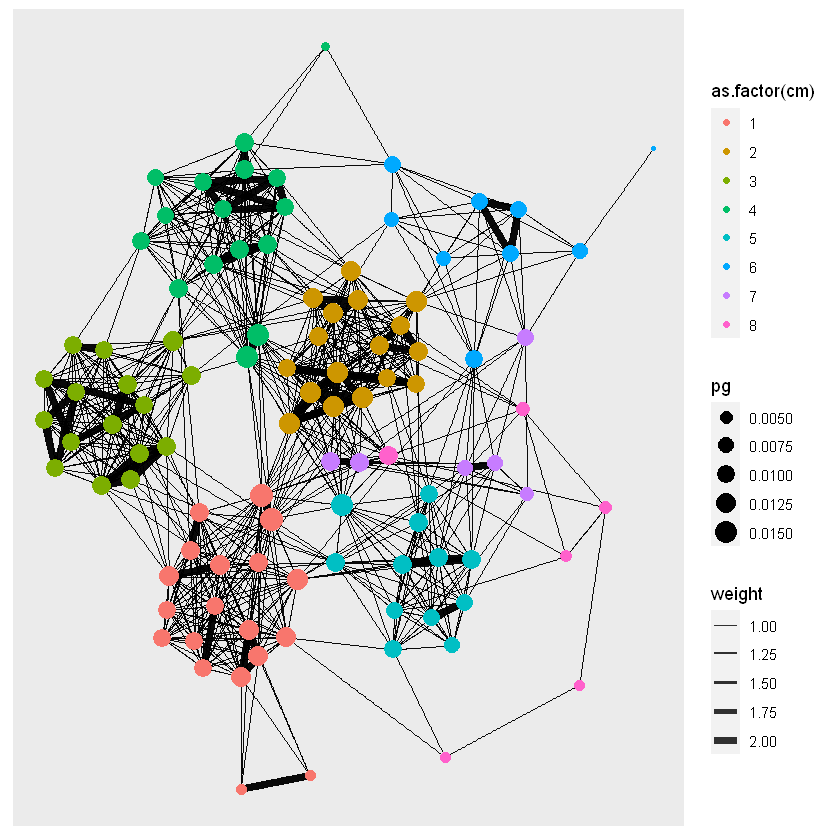

In [38]:
# 여기에서는 kk 말고 lgl라는 새로운 레이아웃을 사용하였다. 노드의 크기는 pg에 따라 달리 그리고, 노드 색깔은 커뮤니티로 구분하게 하였다. 여기서 cm을 팩터형으로 바꾸어야 범주형 데이터로 바뀌게 된다. 그래야 8가지 색깔이 나올 것이다.

km %>% as_tbl_graph() %>%
  mutate(pg=centrality_pagerank(),
         cm=group_infomap()) %>%
  ggraph(layout='lgl') + 
  geom_edge_link(aes(width=weight), alpha=.8) +
  scale_edge_width(range=c(0.2, 2)) +
  geom_node_point(aes(size=pg, color=as.factor(cm)))